# Table of Contents
 <p>

In [2]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [5]:
def line(a,b,x): return a*x+b

In [6]:
a=3.
b=8.

In [7]:
n=30
x = random(n)
y = line(a,b,x)

In [8]:
x

array([ 0.076 ,  0.6457,  0.7964,  0.5561,  0.2465,  0.7335,  0.1817,  0.2656,  0.3042,  0.3236,
        0.8135,  0.2042,  0.0657,  0.7936,  0.4643,  0.436 ,  0.8102,  0.5925,  0.2437,  0.0188,
        0.3343,  0.0905,  0.9201,  0.3829,  0.2448,  0.5505,  0.4667,  0.9611,  0.9567,  0.1315])

In [9]:
y

array([  8.2281,   9.9372,  10.3891,   9.6684,   8.7394,  10.2005,   8.5451,   8.7969,   8.9127,
         8.9708,  10.4406,   8.6127,   8.1971,  10.3809,   9.3928,   9.3079,  10.4305,   9.7774,
         8.7311,   8.0564,   9.0028,   8.2716,  10.7602,   9.1488,   8.7344,   9.6515,   9.4   ,
        10.8832,  10.87  ,   8.3944])

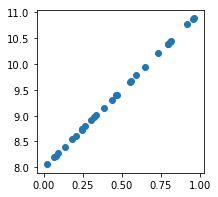

In [10]:
plt.scatter(x,y)

In [17]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, line(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [18]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.8886

In [19]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [ ]:
def upd():
    global a_guess, b_guess
    y_pred = line(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani